In [1]:
%matplotlib notebook

# valid code 2021.05.19

import math

import geometrik.threed as g3d

from goto.globe.blip import Blip

BOD = Blip(44.828333, -0.715556).as_vector
MXP = Blip(45.63, 8.723056).as_vector
MRS = Blip(43.436667, 5.215).as_vector
LHR = Blip(51.4775, -0.461389).as_vector
LIS = Blip(38.774167, -9.134167).as_vector
RKV = Blip(64.13, -21.940556).as_vector
SYD = Blip(-33.946111, 151.177222).as_vector
PRY = Blip(-25.653611, 28.224167).as_vector
SVO = Blip(55.972778, 37.414722).as_vector
SIN = Blip(1.359167, 103.989444).as_vector

T01 = Blip(43.43164989819305, 5.222250835599687).as_vector
T02 = Blip(43.43340699940287, 5.226983180928847).as_vector

A, B = T01, T02

In [2]:
A

Vector(0.723, 0.0661, 0.687)

In [3]:
B

Vector(0.723, 0.0662, 0.688)

# Arc of a circle

The goal here is to compute the arc of circle which would pass through $A$ and $B$ and have a radius of $r$.

$r$ is the radius of the circle, which can not be smaller than twice the distance between $A$ and $B$. And $s$ is the sign of the turn (positive to the right).

In [4]:
r = 0.11
r = 3.563532865590431e-05
w = -1.0

r_min = A.angle_to(B) / 2
r_min

3.36822768756866e-05

We further limit $r < \frac{\pi}{2}$ in order to avoid corner cases (right turns start to turn left)

In [5]:
assert(r_min <= r < math.pi / 2)

$I$ is taken as a middle point between $A$ and $B$ (ie. $A$ and $B$ can not be colinear, neither coincident nor opposite).

In [6]:
I = (A + B).normalized()
I

Vector(0.723, 0.0661, 0.687)

$Q$ is taken as a point, perpendicular to $I$ and which lies in the plane bissecting the sphere at equal distance of $A$ and $B$

In [7]:
Q = w * (B @ A).normalized()
Q

Vector(-0.568, -0.509, 0.647)

In [8]:
t = math.acos(math.cos(r) / (A * I))
t

1.1635335822980306e-05

In [9]:
C = I * math.cos(t) + Q * math.sin(t)
C

Vector(0.723, 0.0661, 0.688)

<IPython.core.display.Javascript object>


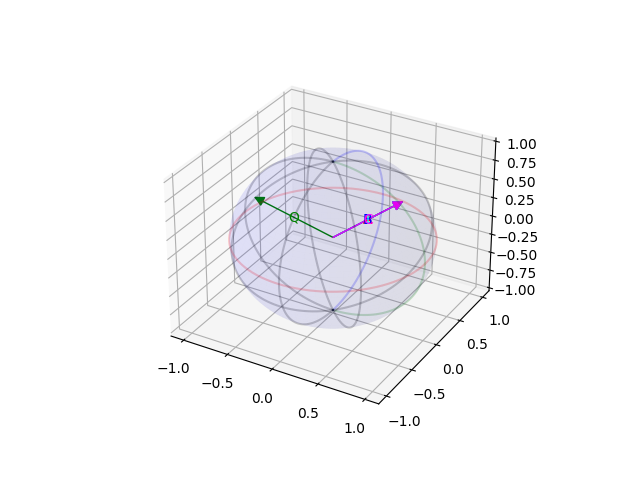

In [10]:
with g3d.UnitSpherePlot() as u :
    u.add_point(A, 'A', 'r')
    u.add_point(B, 'B', 'b')
    u.add_point(I, 'I', 'cyan')
    u.add_point(Q, 'Q', 'g')
    u.add_point(C, 'C', 'magenta')
    u.add_circle_part(C, A, B, 'orange')

In [11]:
A @ B

Vector(-3.83e-05, -3.43e-05, 4.36e-05)

In [12]:
(A @ B).normalized()

Vector(-0.568, -0.509, 0.647)